# <center>**НИР ТМО**</center>

## Щепетов Дмитрий ИУ5-62Б

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler

from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("mushroom_bases.csv")

In [3]:
data.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [4]:
data.sample(10)

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
11746,18,6,0,11,1.023026,26,11,0.943195,1
36769,523,1,6,8,0.267018,1096,11,0.888450,1
33688,127,0,0,5,0.214440,254,6,0.943195,1
37906,515,2,1,5,0.227228,627,12,0.888450,1
19032,794,5,1,6,0.011511,1220,11,1.804273,0
10893,86,2,0,7,0.143669,61,6,0.943195,0
6134,274,6,1,10,1.054858,753,11,0.888450,1
19989,280,2,0,11,0.322724,614,9,0.888450,1
3177,405,0,2,10,0.406283,326,11,0.888450,1
26492,721,6,1,5,0.596423,920,6,0.943195,1


In [5]:
data.shape

(54035, 9)

In [6]:
data.columns

Index(['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color',
       'stem-height', 'stem-width', 'stem-color', 'season', 'class'],
      dtype='object')

In [7]:
data['class'].value_counts()

class
1    29675
0    24360
Name: count, dtype: int64

<Axes: xlabel='class', ylabel='count'>

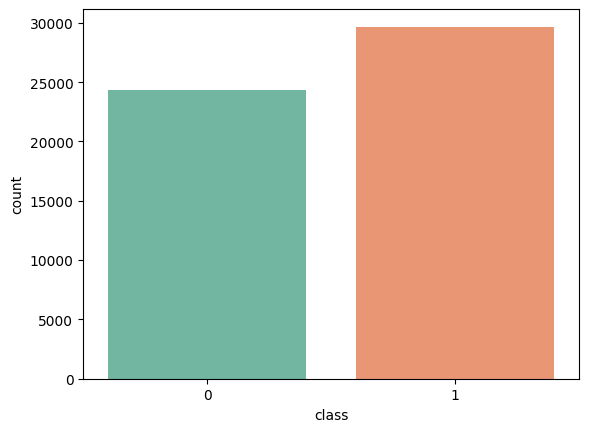

In [8]:
sns.countplot(x='class', data=data, palette='Set2')

In [9]:
data['cap-shape'].value_counts().sort_index()

cap-shape
0     5273
1     1722
2    12294
3     2780
4     1700
5     6889
6    23377
Name: count, dtype: int64

<Axes: title={'center': 'cap-shape'}, xlabel='cap-shape'>

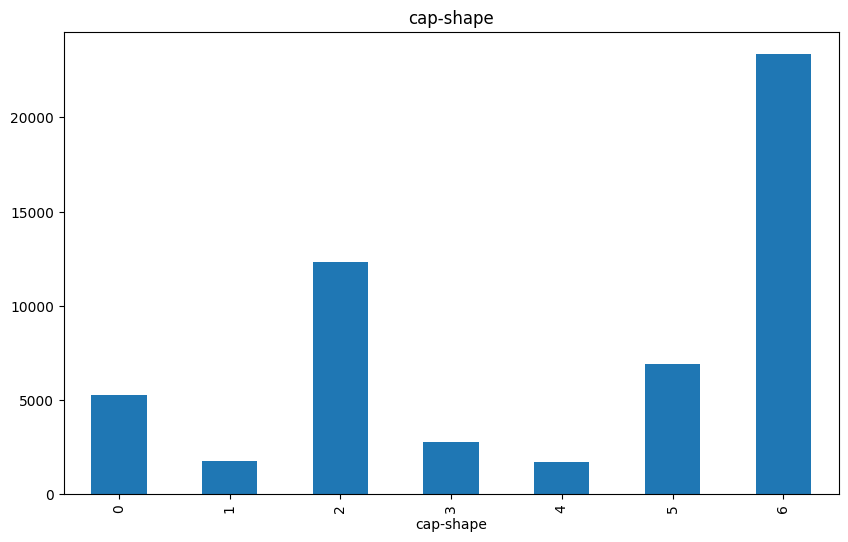

In [10]:
data['cap-shape'].value_counts().sort_index().plot(kind='bar', title='cap-shape', figsize=(10,6))

In [11]:
data.dtypes

cap-diameter         int64
cap-shape            int64
gill-attachment      int64
gill-color           int64
stem-height        float64
stem-width           int64
stem-color           int64
season             float64
class                int64
dtype: object

In [12]:
data['gill-attachment'].value_counts().sort_index()

gill-attachment
0    19405
1    10026
2     4474
3     3042
4     4795
5     5292
6     7001
Name: count, dtype: int64

<Axes: title={'center': 'gill attachment'}, xlabel='gill-attachment'>

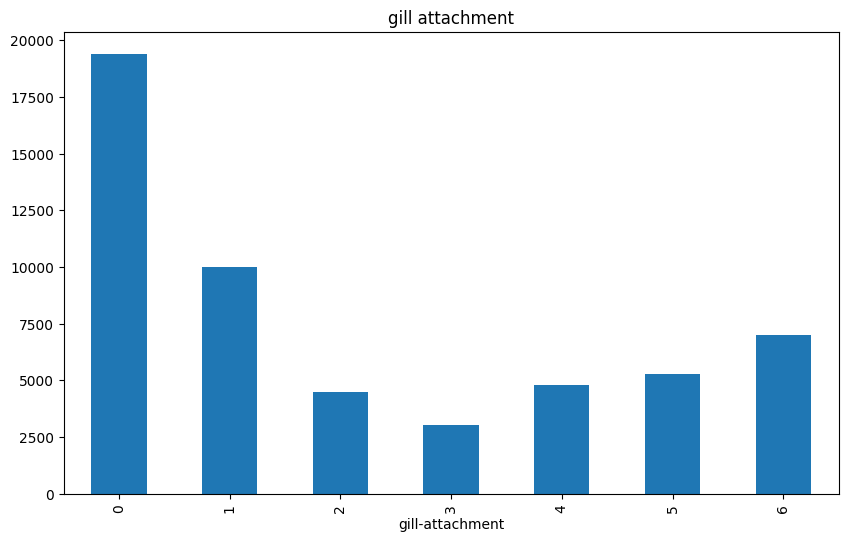

In [13]:
data['gill-attachment'].value_counts().sort_index().plot(kind='bar', title='gill attachment', figsize=(10,6))

In [14]:
data['gill-color'].value_counts().sort_index()

gill-color
0       953
1      1059
2      3042
3      3847
4      1772
5      8154
6      2714
7      5455
8      1271
9      1023
10    16531
11     8214
Name: count, dtype: int64

<Axes: title={'center': 'gill color'}, xlabel='gill-color'>

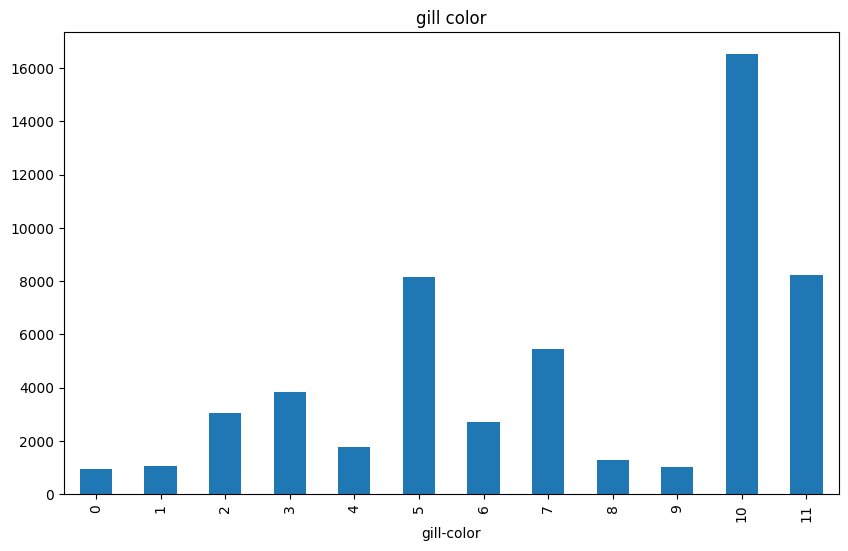

In [15]:
data['gill-color'].value_counts().sort_index().plot(kind='bar', title='gill color', figsize=(10,6))

In [16]:
data['stem-color'].value_counts().sort_index()

stem-color
0       173
1      1918
2      1059
3      2626
4       576
5       226
6     15316
7      1848
8      1025
9       541
10     1393
11    20317
12     7017
Name: count, dtype: int64

<Axes: title={'center': 'stem color'}, xlabel='stem-color'>

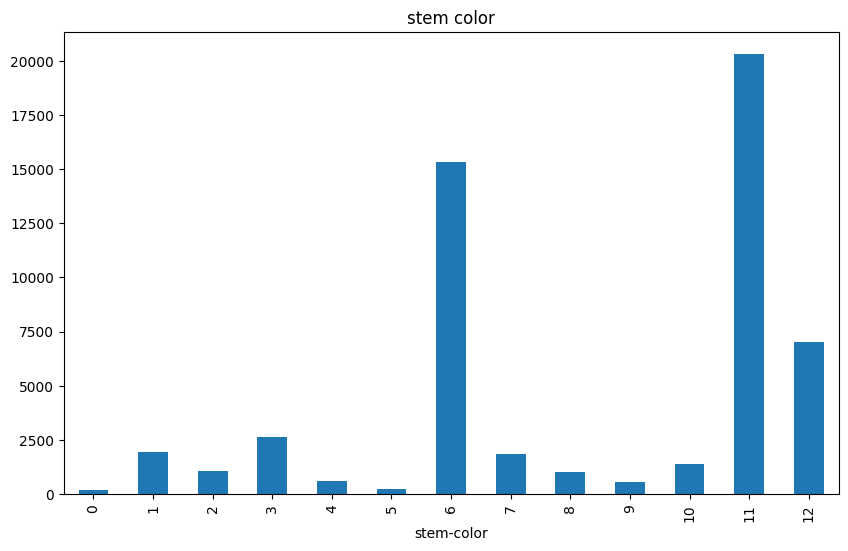

In [17]:
data['stem-color'].value_counts().sort_index().plot(kind='bar', title='stem color', figsize=(10,6))

In [18]:
data.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000
mean,567.257204,4.000315,2.142056,7.329509,0.759110,1051.081299,8.418062,0.952163,0.549181
std,359.883763,2.160505,2.228821,3.200266,0.650969,782.056076,3.262078,0.305594,0.497580
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450,0.000000
50%,525.000000,5.000000,1.000000,8.000000,0.593295,923.000000,11.000000,0.943195,1.000000
75%,781.000000,6.000000,4.000000,10.000000,1.054858,1523.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [20]:
data.isnull().sum()

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64

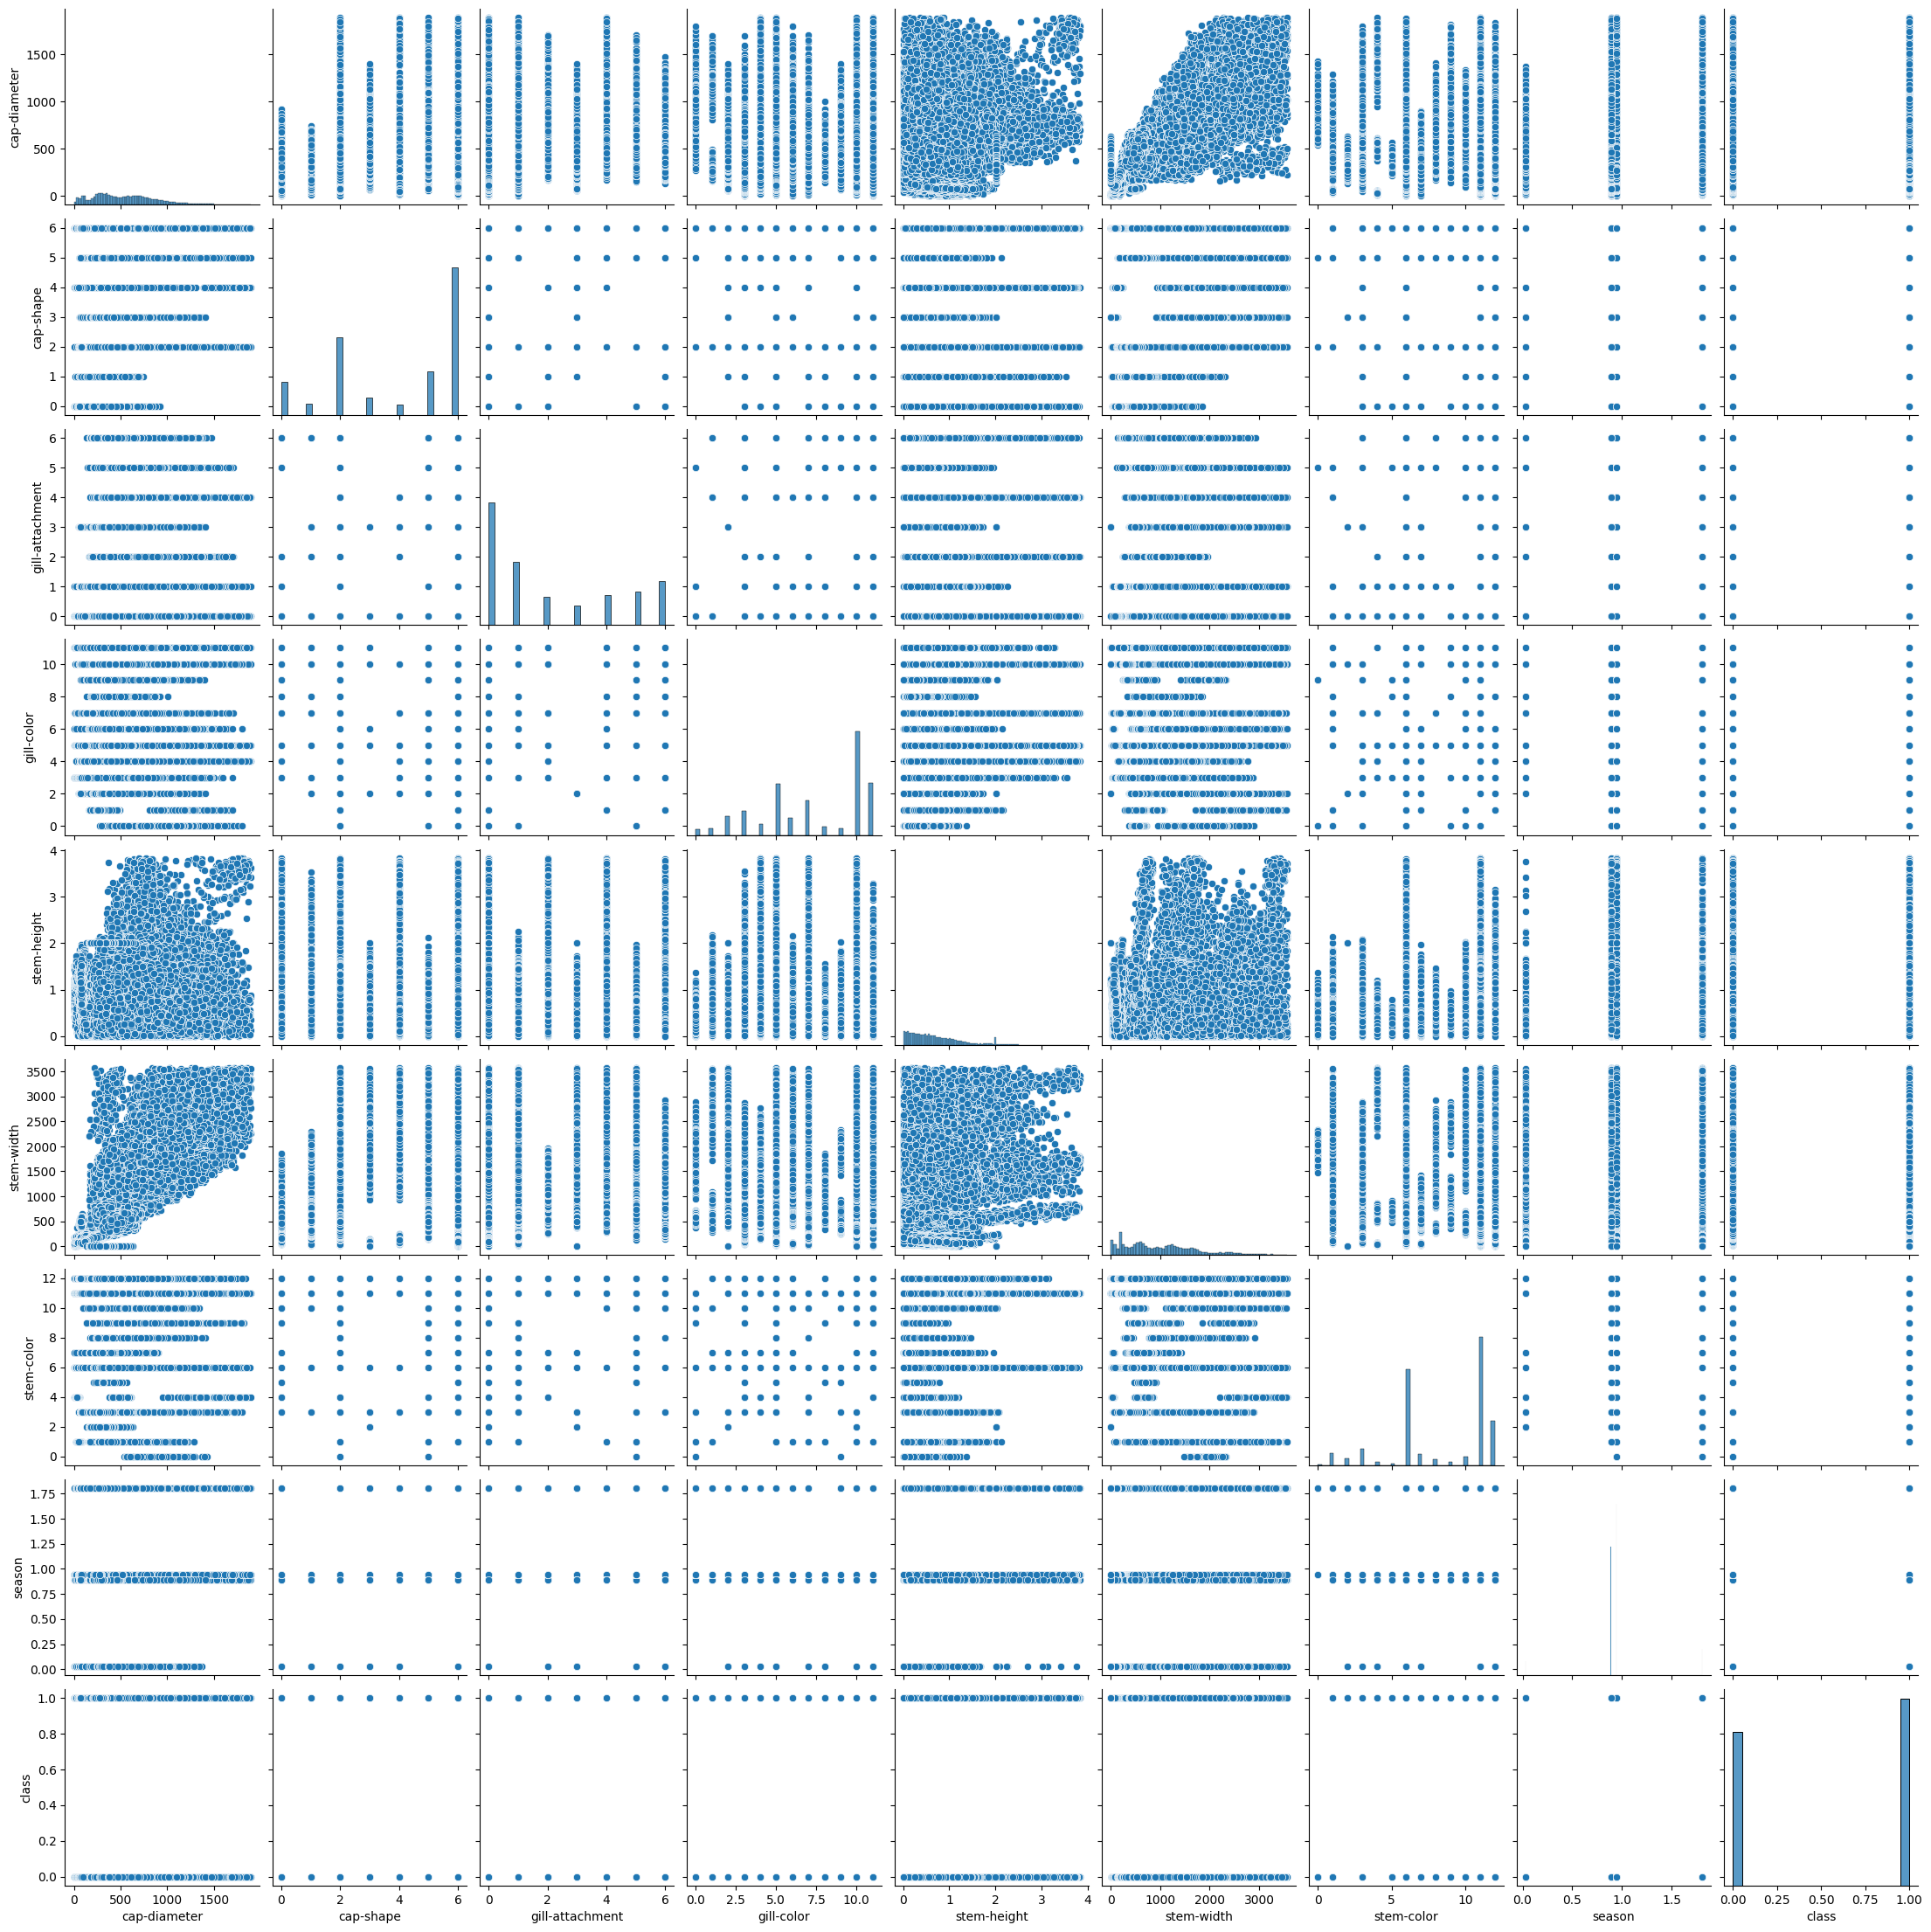

In [21]:
sns.pairplot(data)

In [22]:
data['class'].unique()

array([1, 0], dtype=int64)

После анализа структуры данных был выбран признак 'class' для решения задачи классификации - предсказания, окажется гриб ядовитым или же нет.

Предположения на основании поиска среднего значения с группировкой по целевому признаку:
- У ядовитых грибов ширина стебля меньше
- У ядовитых грибов есть жабры типа 0
- У ядовитых грибов больше высота стебля
- У ядовитых грибов диаметр шляпки меньше

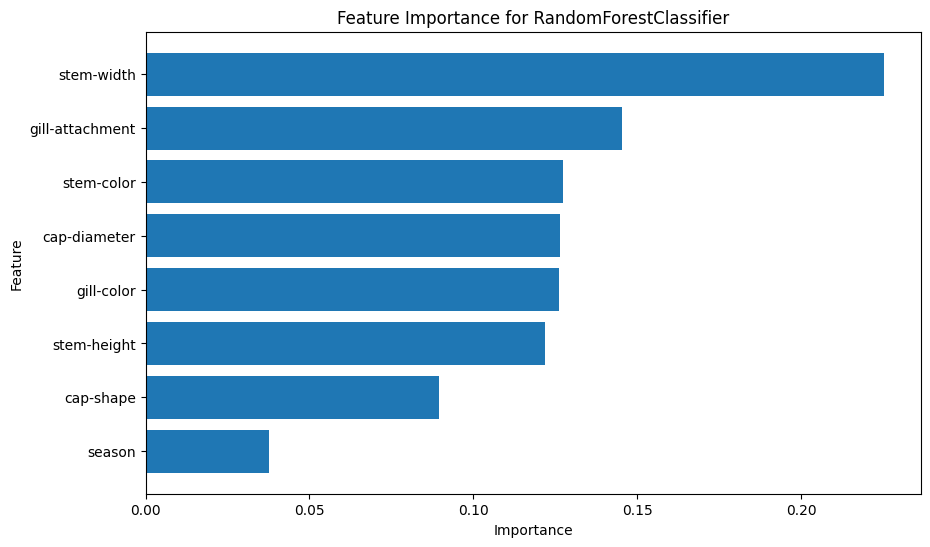

           Feature  Importance
5       stem-width    0.225229
2  gill-attachment    0.145351
6       stem-color    0.127514
0     cap-diameter    0.126447
3       gill-color    0.126139
4      stem-height    0.121994
1        cap-shape    0.089656
7           season    0.037670


In [50]:
df = data
Xd = df.drop('class', axis=1)
yd = df['class']

# Разделение данных на обучающую и тестовую выборки
Xd_train, Xd_test, yd_train, yd_test = train_test_split(Xd, yd, test_size=0.2, random_state=42)

# Обучение модели RandomForestClassifier
rf_modeld = RandomForestClassifier(random_state=42)
rf_modeld.fit(Xd_train, yd_train)

# Извлечение важности признаков
feature_importances = rf_modeld.feature_importances_
features = Xd.columns

# Создание DataFrame для удобного отображения важности признаков
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Визуализация важности признаков
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for RandomForestClassifier')
plt.gca().invert_yaxis()
plt.show()

# Вывод таблицы с важностью признаков
print(importance_df)

### Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.

In [23]:
data.dtypes


cap-diameter         int64
cap-shape            int64
gill-attachment      int64
gill-color           int64
stem-height        float64
stem-width           int64
stem-color           int64
season             float64
class                int64
dtype: object

Среднее значение cap-diameter для ядовитых грибов: 513.2362931760741
Среднее значение cap-diameter для съедобных грибов: 633.0646962233169


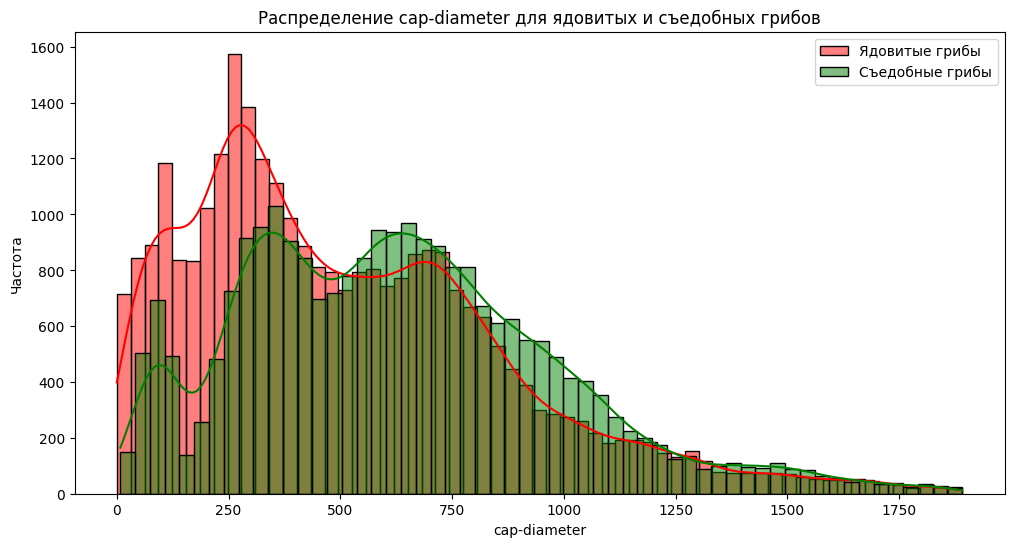

Среднее значение cap-shape для ядовитых грибов: 3.7393091828138165
Среднее значение cap-shape для съедобных грибов: 4.318267651888341


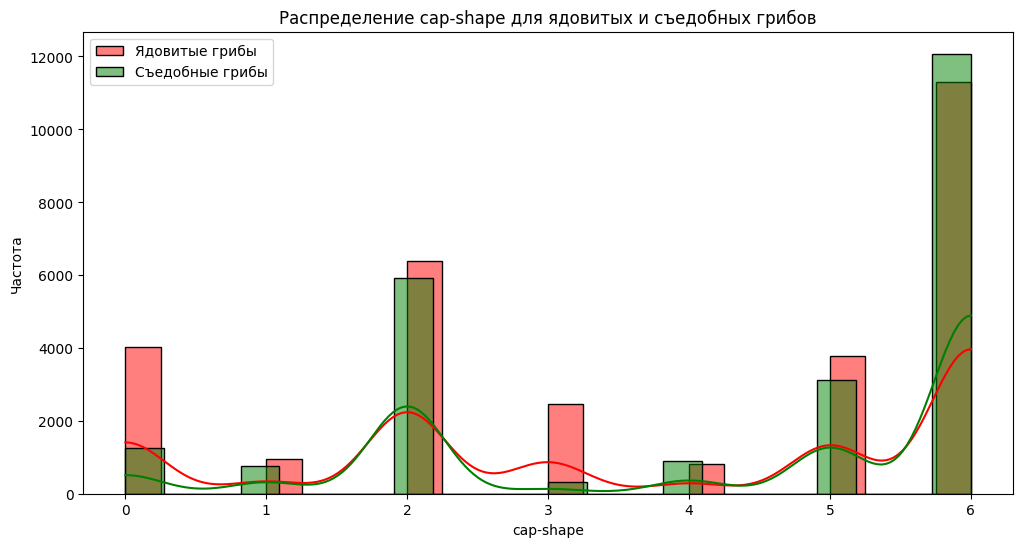

Среднее значение gill-attachment для ядовитых грибов: 2.035956192080876
Среднее значение gill-attachment для съедобных грибов: 2.2713054187192117


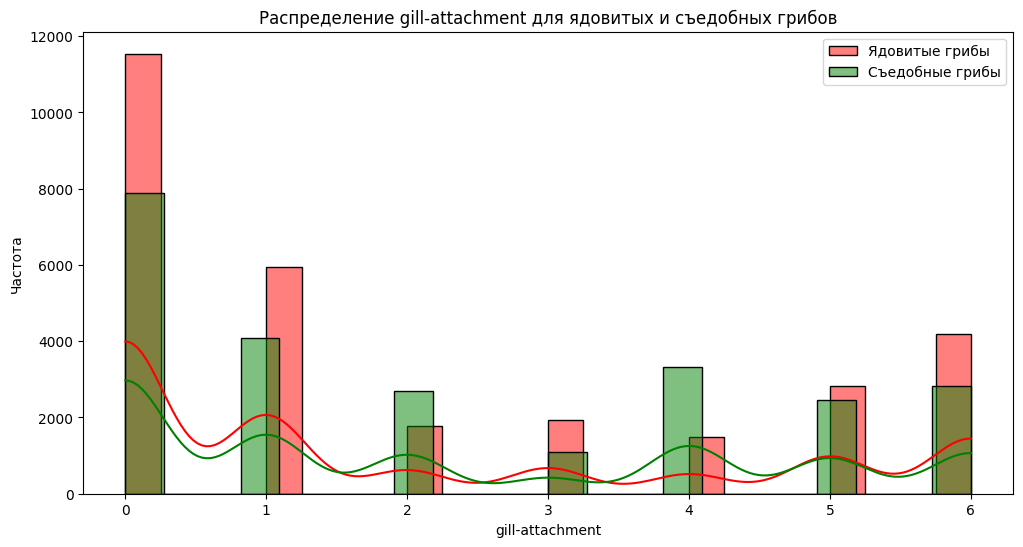

Среднее значение gill-color для ядовитых грибов: 7.144094355518113
Среднее значение gill-color для съедобных грибов: 7.555377668308703


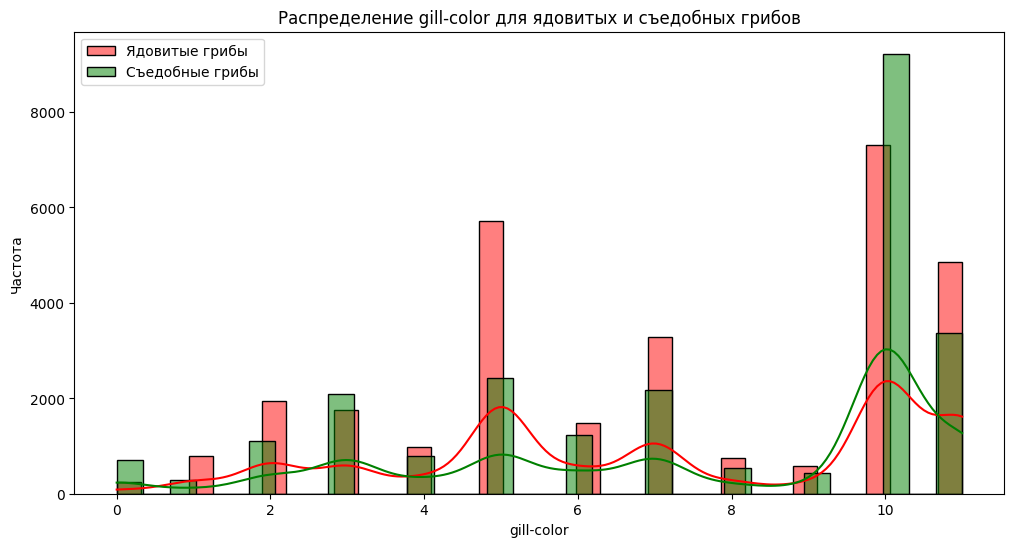

Среднее значение stem-height для ядовитых грибов: 0.8672505745722471
Среднее значение stem-height для съедобных грибов: 0.6273742928917482


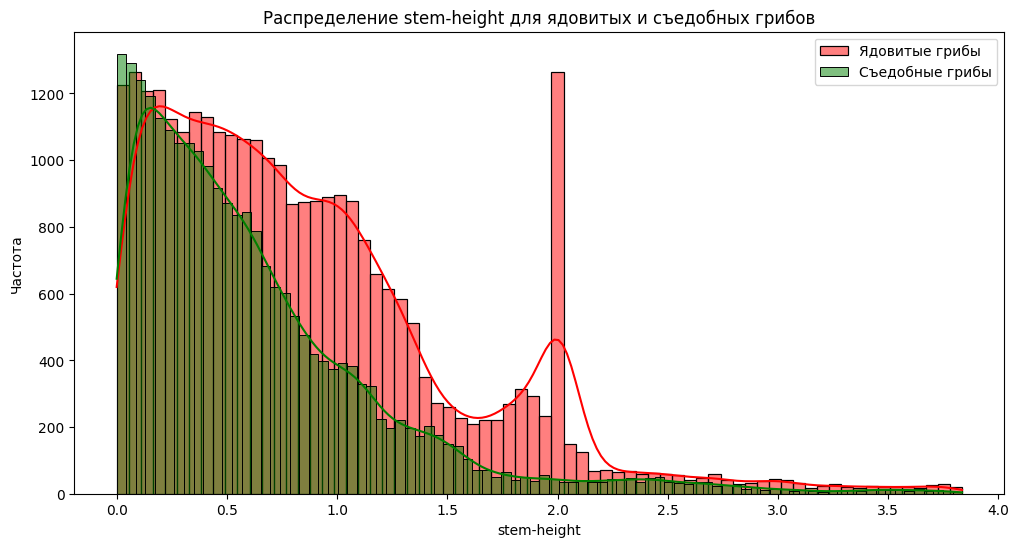

Среднее значение stem-width для ядовитых грибов: 921.5165627632688
Среднее значение stem-width для съедобных грибов: 1208.9151888341544


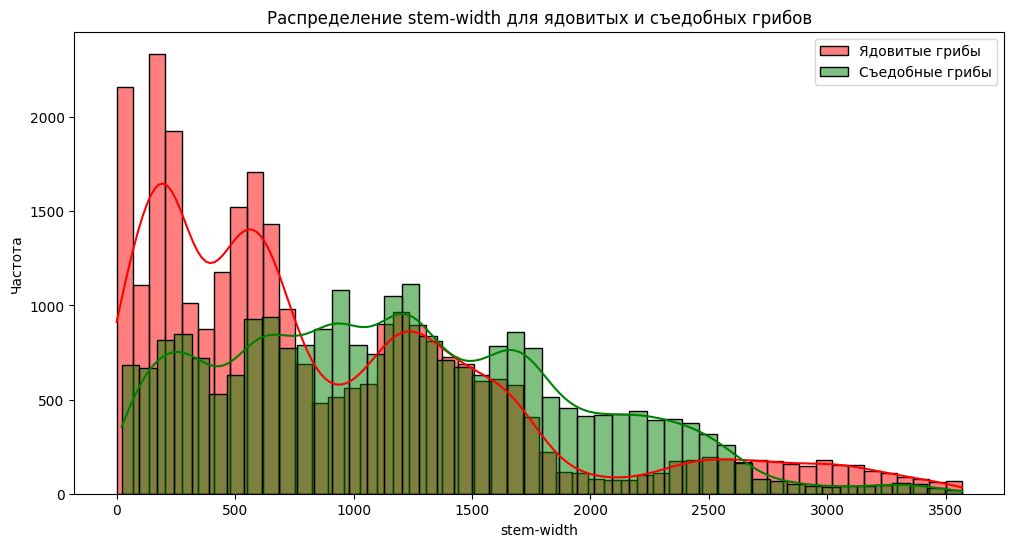

Среднее значение stem-color для ядовитых грибов: 8.038753159224937
Среднее значение stem-color для съедобных грибов: 8.880131362889983


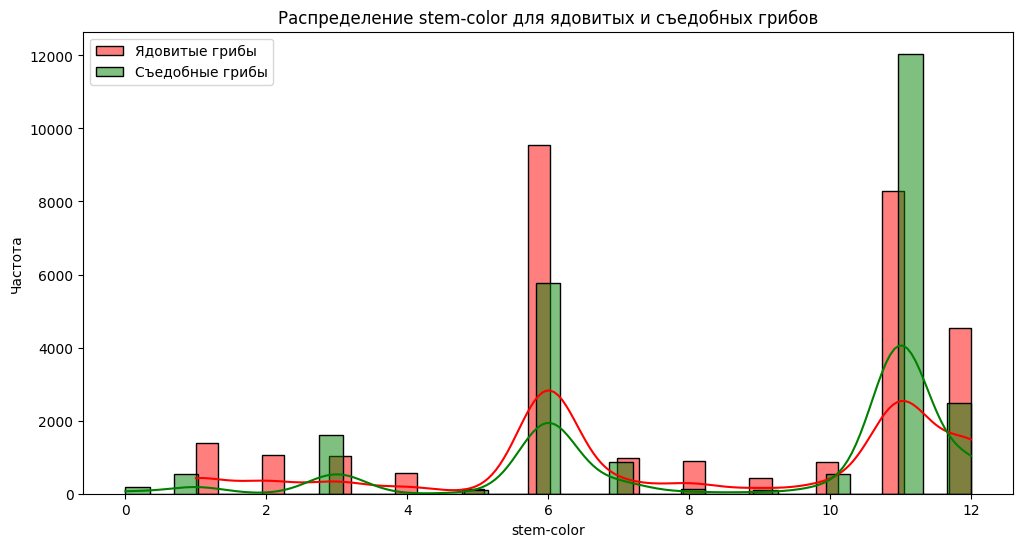

Среднее значение season для ядовитых грибов: 0.9292047859925687
Среднее значение season для съедобных грибов: 0.9801302596581686


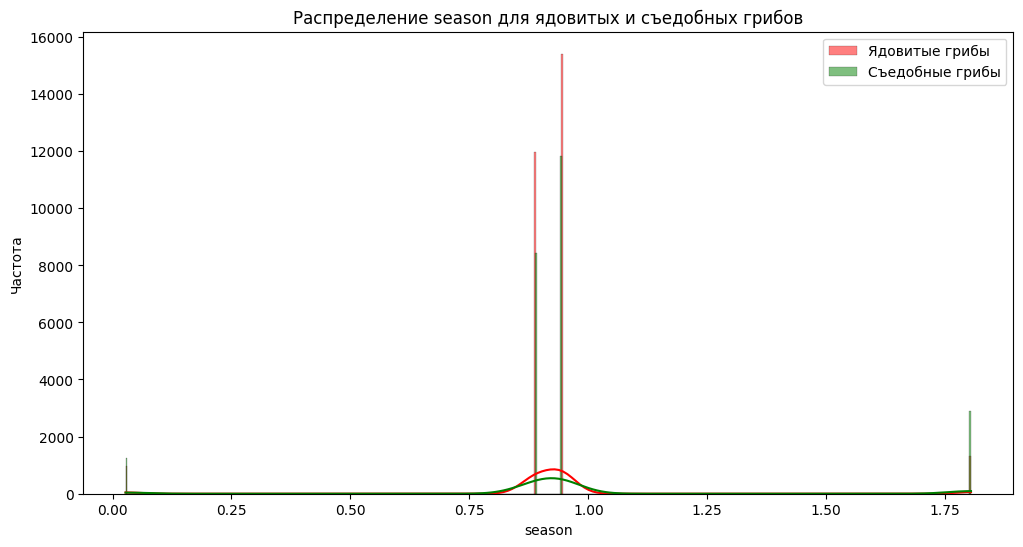

In [62]:
def plot_feature_distribution(data, feature):
    mean_poisonous = data[data['class'] == 1][feature].mean()
    mean_edible = data[data['class'] == 0][feature].mean()
    
    print(f'Среднее значение {feature} для ядовитых грибов: {mean_poisonous}')
    print(f'Среднее значение {feature} для съедобных грибов: {mean_edible}')
    
    plt.figure(figsize=(12, 6))
    sns.histplot(data[data['class'] == 1][feature], kde=True, color='red', label='Ядовитые грибы')
    sns.histplot(data[data['class'] == 0][feature], kde=True, color='green', label='Съедобные грибы')
    plt.xlabel(feature)
    plt.ylabel('Частота')
    plt.title(f'Распределение {feature} для ядовитых и съедобных грибов')
    plt.legend()
    plt.show()

# Список признаков
features = ['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color', 'stem-height', 'stem-width', 'stem-color', 'season']

# Построение графиков для всех признаков
for feature in features:
    plot_feature_distribution(data, feature)

Для построения моделей будем использовать все признаки.

В данном датасете признаки 'cap-diameter', 'stem-height', 'stem-width', 'season' являются категориальными. Остальными таковыми не являются

Вспомогательные признаки для улучшения качества моделей в данном наборе данных строить не буду.

Выполним масштабирование данных. Для этого необходимо объединить обучающую и тестовые выборки.

In [24]:
data1 = data.copy()

# Признаки, которые нужно отмасштабировать
features_to_scale = ['cap-diameter', 'stem-height', 'stem-width', 'season']
# Применение Min-Max Scaling к указанным признакам
scaler = MinMaxScaler()
data1[features_to_scale] = scaler.fit_transform(data[features_to_scale])

# Вывод преобразованных данных
print(data1.head())

   cap-diameter  cap-shape  gill-attachment  gill-color  stem-height  \
0      0.725542          2                2          10     0.992737   
1      0.772607          2                2          10     0.992737   
2      0.725013          2                2          10     0.941896   
3      0.666843          6                2          10     0.987549   
4      0.690111          6                2          10     0.967835   

   stem-width  stem-color    season  class  
0    0.432894          11  1.000000      1  
1    0.436257          11  1.000000      1  
2    0.438778          11  1.000000      1  
3    0.438778          11  1.000000      1  
4    0.410199          11  0.515404      1  


Построение корреляционного анализа данных

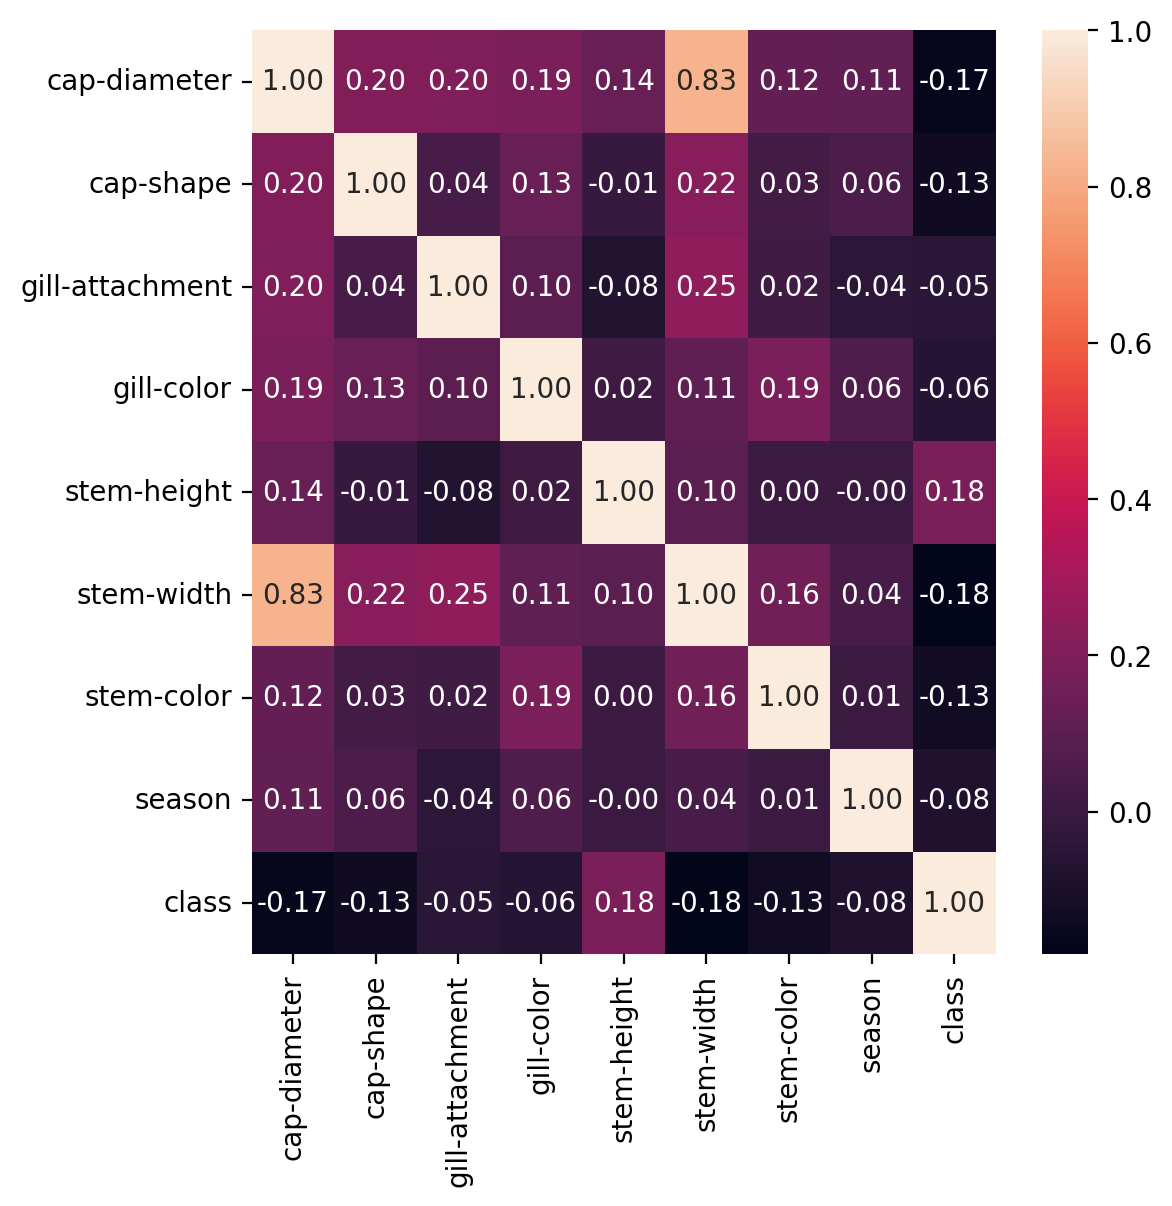

In [64]:
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(6, 6), dpi=200)
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.show()

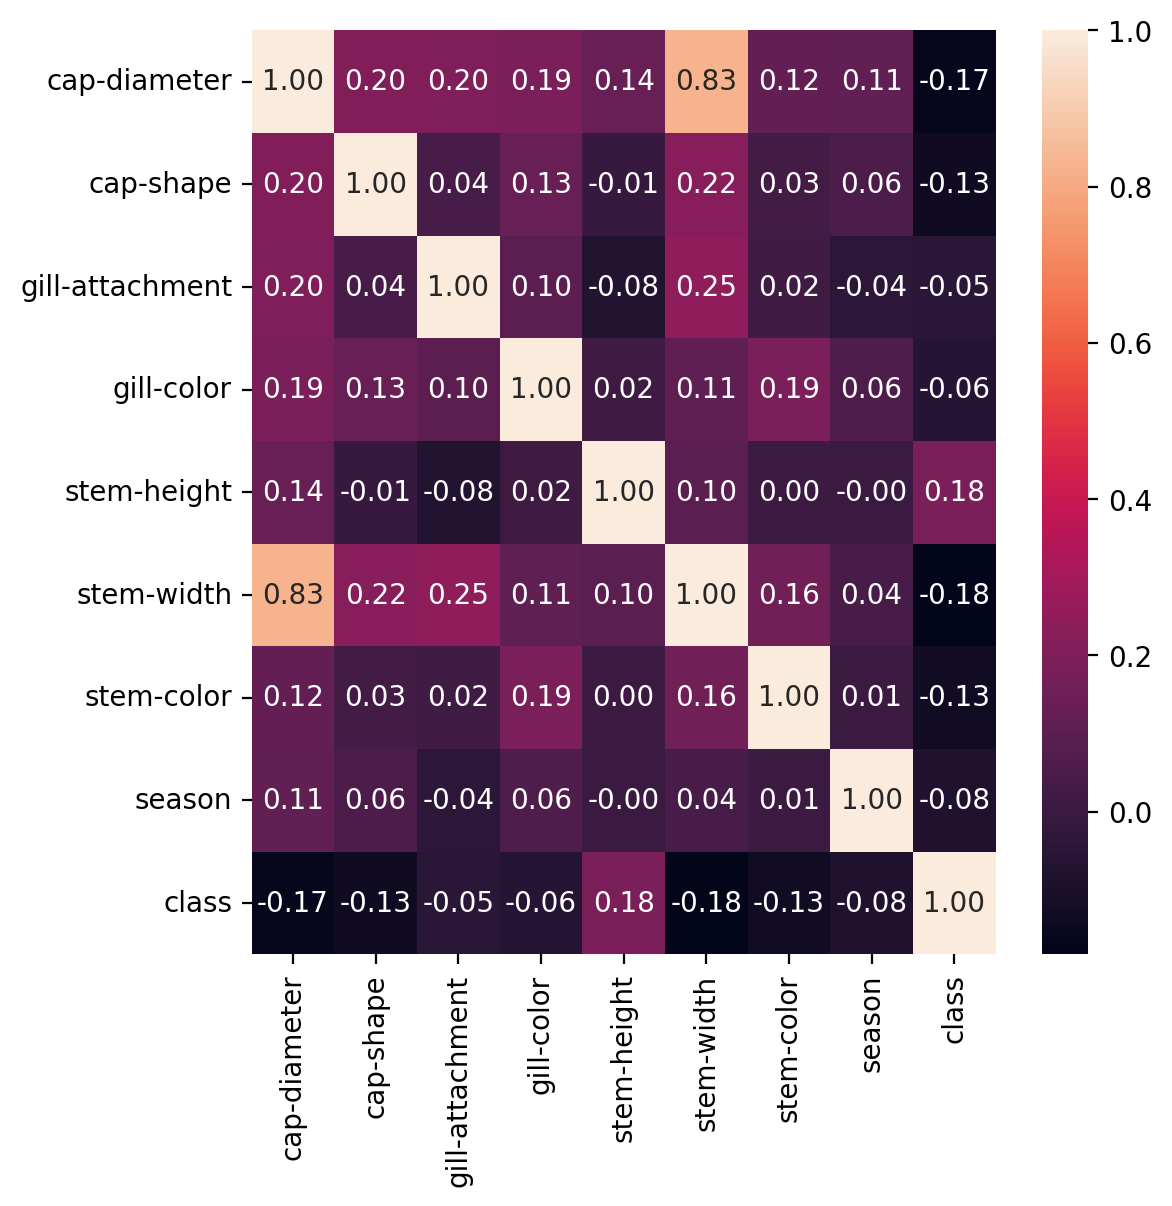

In [65]:
corr_matrix = data1.corr()
fig, ax = plt.subplots(figsize=(6, 6), dpi=200)
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.show()

На основе корреляционной матрицы можно сделать следующие выводы:

- Корреляционные матрицы для исходных и масштабированных данных совпадают.
- Целевой признак регрессии "Cap-diameter" наиболее сильно коррелирует с "stem-width" (0.83)Эти признаки обязательно следует оставить в модели регрессии.

## Выбор метрик для последующей оценки качества моделей.

Выберем метрики, учитывающие количество истинно положительных предсказаний
- TP - количество истинно положительных предсказаний,
- TN - количество истинно отрицательных предсказаний,
- FP - количество ложноположительных предсказаний,
- FN - количество ложноотрицательных предсказаний.

#### Accuracy
- $$ Accuracy = {TP+TN \over TP+TN+FP+FN} $$
#### Precision 
- $$ Precision = {TP\over TP+FP} $$
#### Recall
- $$ Recall = {TP\over TP+FN} $$
#### F1-score
- $$ F1-score = {2 * Precision * Recall \over Precision + Recall} $$

Используем следующие модели

- KNN
- SVC
- Дерево решений
- Случайный лес
- Градиентный бустинг

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split

In [28]:
def evaluate_models(X_train, X_test, y_train, y_test, models, num_mod):

    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
    model = models[num_mod]
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f'{model.__class__.__name__}:')
    for i, metric in enumerate(metrics):
        print(f'{metric}: {round([accuracy, precision, recall, f1][i], 2)}')


    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_proba = model.decision_function(X_test)

    print("ROC AUC score:", roc_auc_score(y_test, y_proba))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model.__class__.__name__}: ROC curve')
    plt.legend(loc="lower right")
    plt.show()

## Формирование обучающей и тестовой выборок на основе исходного набора данных

In [29]:
X = data.drop(columns=['class'])  # Признаки
y = data['class'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Создание моделей

In [30]:
knn = KNeighborsClassifier()
svc = SVC()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()

In [31]:
models = [knn, svc, decision_tree, random_forest, gradient_boosting]

KNeighborsClassifier:
Accuracy: 0.72
Precision: 0.74
Recall: 0.74
F1-score: 0.74
ROC AUC score: 0.7951912325518053


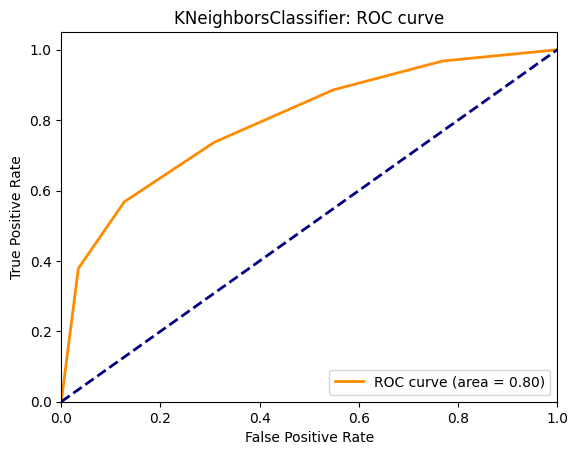

In [32]:
evaluate_models(X_train, X_test, y_train, y_test, models, 0)
# metrics_recorder.print_metrics()
# metrics_recorder.plot_metrics()

In [33]:
# evaluate_models(X_train, X_test, y_train, y_test, models, 1)

RandomForestClassifier:
Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1-score: 0.99
ROC AUC score: 0.9993568777453278


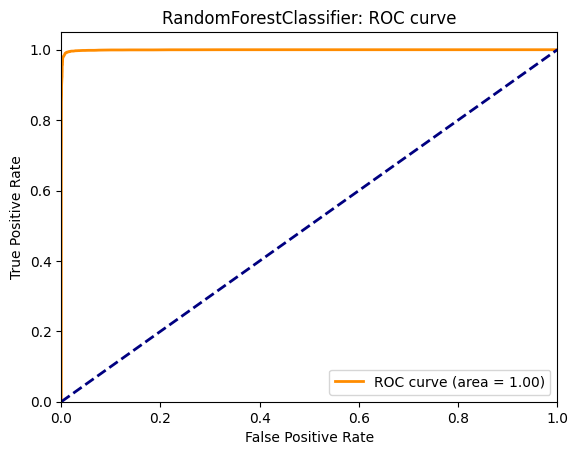

In [35]:
evaluate_models(X_train, X_test, y_train, y_test, models, 3)

GradientBoostingClassifier:
Accuracy: 0.88
Precision: 0.9
Recall: 0.89
F1-score: 0.89
ROC AUC score: 0.9452147255706624


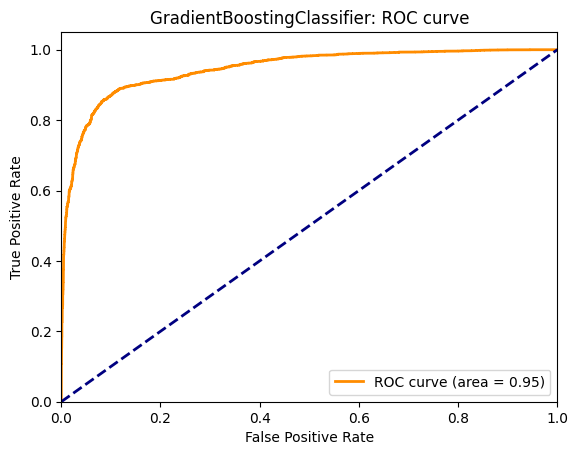

In [36]:
evaluate_models(X_train, X_test, y_train, y_test, models, 4)

In [60]:
knn_model = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='precision')
grid_search.fit(X_train, y_train)

print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best hyperparameters: {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}
Best score: 0.7475562898671996


In [38]:
best_knn_model = KNeighborsClassifier(**grid_search.best_params_)
best_knn_model

KNeighborsClassifier(weights='distance')

In [39]:
tree_model = DecisionTreeClassifier()

# Определение сетки параметров для подбора
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [3, 5, 7, 9, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['sqrt', 'log2', None]}

# Инициализация GridSearchCV с моделью DecisionTreeClassifier и сеткой параметров
grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='accuracy')

# Обучение GridSearchCV
grid_search.fit(X_train, y_train)

# Вывод лучших параметров и оценки
print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.9770749620006349


In [40]:
best_tree_model = DecisionTreeClassifier(**grid_search.best_params_)
best_tree_model

DecisionTreeClassifier(criterion='entropy')

In [41]:
rf_model = RandomForestClassifier()

# Определение сетки параметров для подбора
param_grid = {'n_estimators': [100],
              'max_depth': [5, None],
              'min_samples_split': [2, 5],
              'min_samples_leaf': [1, 2],
              'max_features': ['sqrt', None]}

# Инициализация GridSearchCV с моделью RandomForestClassifier и сеткой параметров
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')

# Обучение GridSearchCV
grid_search.fit(X_train, y_train)

# Вывод лучших параметров и оценки
print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best score: 0.9897056900512103


In [42]:
best_rf_model = RandomForestClassifier(**grid_search.best_params_)
best_rf_model

RandomForestClassifier(min_samples_split=5)

In [45]:
opt_models = [ best_knn_model, best_tree_model, best_rf_model]

KNeighborsClassifier:
Accuracy: 0.73
Precision: 0.76
Recall: 0.75
F1-score: 0.75
ROC AUC score: 0.8109146313706337


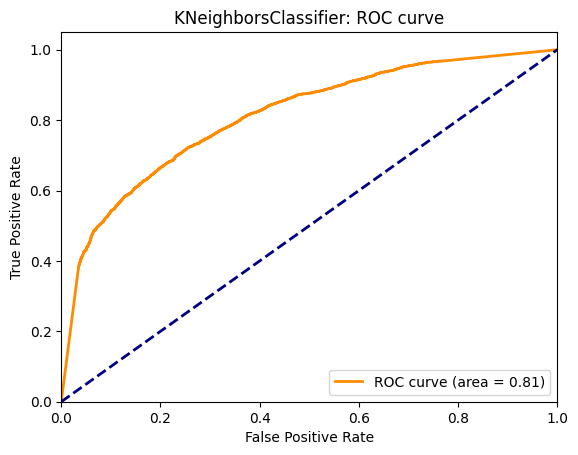

In [46]:
evaluate_models(X_train, X_test, y_train, y_test, opt_models, 0)

DecisionTreeClassifier:
Accuracy: 0.98
Precision: 0.97
Recall: 0.98
F1-score: 0.98
ROC AUC score: 0.9749899510528721


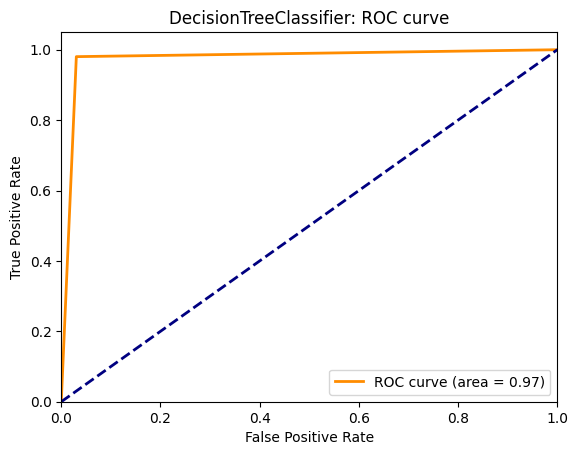

In [47]:
evaluate_models(X_train, X_test, y_train, y_test, opt_models, 1)

RandomForestClassifier:
Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1-score: 0.99
ROC AUC score: 0.9994550013362906


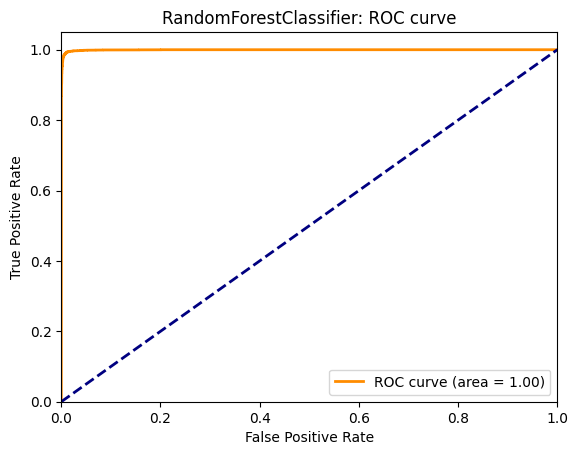

In [48]:
evaluate_models(X_train, X_test, y_train, y_test, opt_models, 2)